**Introduction**

> This project is a regression problem, where I will be using regression models for predicting temperature, relative humidity or/and absolute humidity in some place in Italy from data like concentrations of some gases in that area; measured by chemical sensors, and also the time of the day.

**Background**



> The dataset contains 9357 instances of hourly averaged responses from an array of 5 metal oxide chemical sensors embedded in an Air Quality Chemical Multisensor Device. The device was located on the field in a significantly polluted area, at road level,within an Italian city. Data were recorded from March 2004 to February 2005 (one year) representing the longest freely available recordings of on field deployed air quality chemical sensor devices responses. Ground Truth hourly averaged concentrations for CO, Non Metanic Hydrocarbons, Benzene, Total Nitrogen Oxides (NOx) and Nitrogen Dioxide (NO2) and were provided by a co-located reference certified analyzer.





**Reference**



> Dataset is taken from https://www.kaggle.com/datasets/fedesoriano/air-quality-data-set.



**Importing Basic Libraries**

In [ ]:
import pandas as pd
import numpy as np

**Getting** **The** **Dataset**

In [ ]:
data = pd.read_csv('AirQuality.csv', delimiter=';')
print(data.isnull().sum())

data

Date              114
Time              114
CO(GT)            114
PT08.S1(CO)       114
NMHC(GT)          114
C6H6(GT)          114
PT08.S2(NMHC)     114
NOx(GT)           114
PT08.S3(NOx)      114
NO2(GT)           114
PT08.S4(NO2)      114
PT08.S5(O3)       114
T                 114
RH                114
AH                114
Unnamed: 15      9471
Unnamed: 16      9471
dtype: int64


,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",NaN,NaN
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",NaN,NaN
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",NaN,NaN
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867",NaN,NaN
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Cleaning and Understanding Data**

In [ ]:
data.drop(['Unnamed: 15', 'Unnamed: 16'], axis=1, inplace=True)
data

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578"
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255"
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502"
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867"
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   object 
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   object 
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   object 
 13  RH             9357 non-null   object 
 14  AH             9357 non-null   object 
dtypes: float64(8), object(7)
memory usage: 1.1+ MB


In [ ]:
data.dropna(inplace=True)
data.reset_index(inplace=True, drop=True)
data

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578"
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255"
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502"
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867"
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,04/04/2005,10.00.00,"3,1",1314.0,-200.0,"13,5",1101.0,472.0,539.0,190.0,1374.0,1729.0,"21,9","29,3","0,7568"
9353,04/04/2005,11.00.00,"2,4",1163.0,-200.0,"11,4",1027.0,353.0,604.0,179.0,1264.0,1269.0,"24,3","23,7","0,7119"
9354,04/04/2005,12.00.00,"2,4",1142.0,-200.0,"12,4",1063.0,293.0,603.0,175.0,1241.0,1092.0,"26,9","18,3","0,6406"
9355,04/04/2005,13.00.00,"2,1",1003.0,-200.0,"9,5",961.0,235.0,702.0,156.0,1041.0,770.0,"28,3","13,5","0,5139"


In [ ]:
data.drop('Date', axis=1, inplace=True)

Convert strings to floats to work with them

In [ ]:
for col in ['CO(GT)', 'C6H6(GT)', 'T', 'RH', 'AH']:
  data[col] = data[col].str.replace(',', '.')
  data[col] = data[col].astype(float)
data

,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,10.00.00,3.1,1314.0,-200.0,13.5,1101.0,472.0,539.0,190.0,1374.0,1729.0,21.9,29.3,0.7568
9353,11.00.00,2.4,1163.0,-200.0,11.4,1027.0,353.0,604.0,179.0,1264.0,1269.0,24.3,23.7,0.7119
9354,12.00.00,2.4,1142.0,-200.0,12.4,1063.0,293.0,603.0,175.0,1241.0,1092.0,26.9,18.3,0.6406
9355,13.00.00,2.1,1003.0,-200.0,9.5,961.0,235.0,702.0,156.0,1041.0,770.0,28.3,13.5,0.5139


Converting Time to integers

In [ ]:
data['Time'] = data['Time'].str.replace('[\..*$]', '')

<ipython-input-228-1a454a122110>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data['Time'] = data['Time'].str.replace('[\..*$]', '')


In [ ]:
data

,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,180000,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,190000,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,200000,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,210000,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,220000,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,100000,3.1,1314.0,-200.0,13.5,1101.0,472.0,539.0,190.0,1374.0,1729.0,21.9,29.3,0.7568
9353,110000,2.4,1163.0,-200.0,11.4,1027.0,353.0,604.0,179.0,1264.0,1269.0,24.3,23.7,0.7119
9354,120000,2.4,1142.0,-200.0,12.4,1063.0,293.0,603.0,175.0,1241.0,1092.0,26.9,18.3,0.6406
9355,130000,2.1,1003.0,-200.0,9.5,961.0,235.0,702.0,156.0,1041.0,770.0,28.3,13.5,0.5139


In [ ]:
data.dtypes

Time              object
CO(GT)           float64
PT08.S1(CO)      float64
NMHC(GT)         float64
C6H6(GT)         float64
PT08.S2(NMHC)    float64
NOx(GT)          float64
PT08.S3(NOx)     float64
NO2(GT)          float64
PT08.S4(NO2)     float64
PT08.S5(O3)      float64
T                float64
RH               float64
AH               float64
dtype: object

In [ ]:
data['Time'] = data['Time'].astype(float) / 10000
data['Time'] = data['Time'].astype(int)
data.dtypes

Time               int64
CO(GT)           float64
PT08.S1(CO)      float64
NMHC(GT)         float64
C6H6(GT)         float64
PT08.S2(NMHC)    float64
NOx(GT)          float64
PT08.S3(NOx)     float64
NO2(GT)          float64
PT08.S4(NO2)     float64
PT08.S5(O3)      float64
T                float64
RH               float64
AH               float64
dtype: object

In [ ]:
data.head()

,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,18,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,19,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,20,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,21,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,22,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


**Replacing missing values which the source of data says they labeled by -200, by the mean of columns.**

In [ ]:
for col in data.columns:
  mean = data[col].mean()
  if col == 'Time':
    mean = int(mean)
  data[col].replace(-200, mean, inplace=True)

**Graphical Sense of Data**

<Axes: >

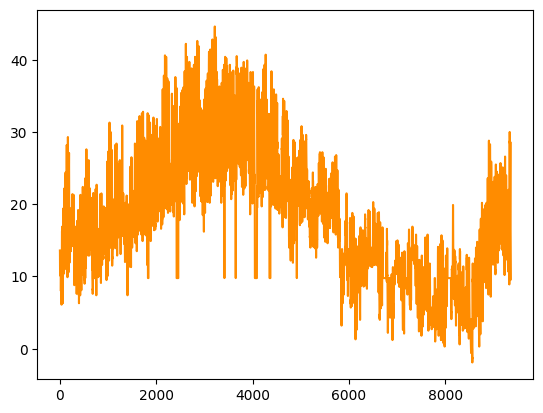

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

data['T'].plot(color='darkorange')

>**Just understanding the effect of time on other variables..**

<Axes: title={'center': 'Time importance'}, xlabel='Time'>

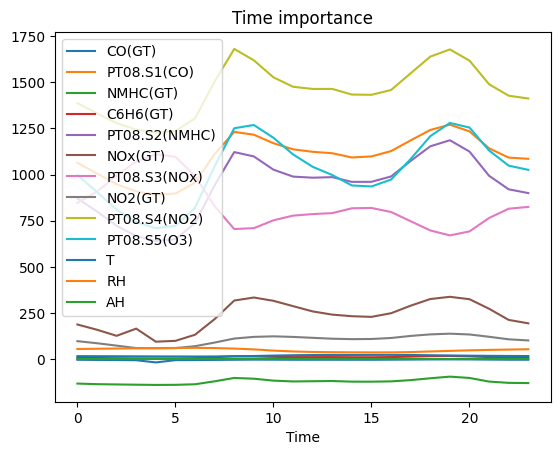

In [ ]:
data.groupby(data['Time']).mean().plot(title="Time importance")

>**Relations of outputs with data**

RH

<Axes: title={'center': 'Relations of RH with data'}, xlabel='RH'>

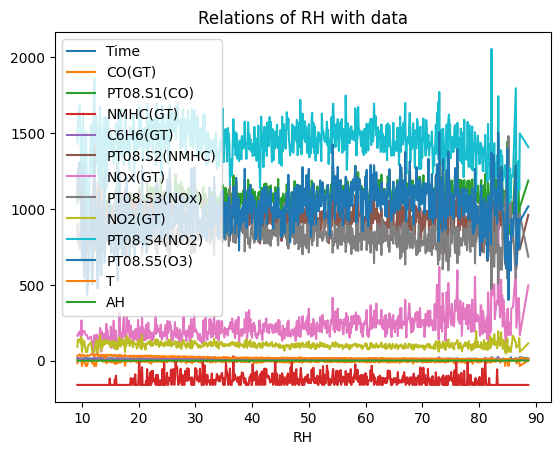

In [ ]:
data.groupby(data['RH']).mean().plot(title='Relations of RH with data')

> **NOTE**: We notice that there is no noticed deviation of data with respect to different values of RH, so that the relation is weak and we should expect this variable to fail in predicting later, and that can be derived simply by removing other output columns('AH', 'T') from y, which I have tested and the result is r2 score for predicting relative humidity alone is less than 0.71 for xgboost!
> > So we won't be using this variable later.

AH

<Axes: title={'center': 'Relations of AH with data'}, xlabel='AH'>

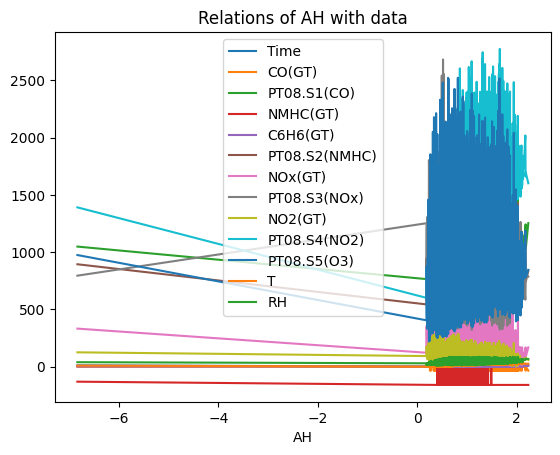

In [ ]:
data.groupby(data['AH']).mean().plot(title='Relations of AH with data')

Temperature

<Axes: title={'center': 'Relations of Temperature with data'}, xlabel='T'>

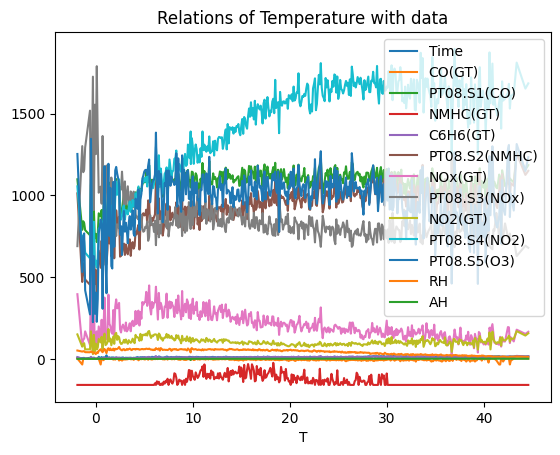

In [ ]:
data.groupby(data['T']).mean().plot(title='Relations of Temperature with data')

**Inputs and Outputs**

In [ ]:
data.head()

,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,18,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,19,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,20,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,21,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,22,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


In [ ]:
x = data.iloc[:, :11]
y = data.loc[:,['T', 'AH']]
#y = data.loc[:,['T', 'AH', 'RH']]
#y = data.loc[:,['RH']]
y

,T,AH
0,13.6,0.7578
1,13.3,0.7255
2,11.9,0.7502
3,11.0,0.7867
4,11.2,0.7888
...,...,...
9352,21.9,0.7568
9353,24.3,0.7119
9354,26.9,0.6406
9355,28.3,0.5139


**Data** **Splitting**

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
x_train

,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3)
4367,17,3.400000,1048.990061,-159.090093,1.865683,894.595276,168.616971,794.990168,58.148873,1391.479641,975.072032
794,20,1.200000,964.000000,68.000000,3.700000,692.000000,88.000000,1176.000000,82.000000,1292.000000,573.000000
8496,18,1.200000,905.000000,-159.090093,2.900000,648.000000,188.000000,1007.000000,132.000000,822.000000,509.000000
3027,21,2.900000,1084.000000,-159.090093,16.700000,1200.000000,185.000000,686.000000,159.000000,1753.000000,1505.000000
8508,6,0.300000,779.000000,-159.090093,0.200000,402.000000,34.000000,1665.000000,31.000000,684.000000,257.000000
...,...,...,...,...,...,...,...,...,...,...,...
5734,16,-34.207524,1530.000000,-159.090093,24.800000,1425.000000,595.000000,457.000000,143.000000,1975.000000,1652.000000
5191,1,-34.207524,747.000000,-159.090093,1.500000,543.000000,168.616971,1276.000000,58.148873,1100.000000,469.000000
5390,8,3.600000,1440.000000,-159.090093,24.300000,1412.000000,446.000000,494.000000,104.000000,2016.000000,1455.000000
860,14,4.000000,1418.000000,542.000000,19.500000,1282.000000,231.000000,681.000000,129.000000,1890.000000,1418.000000


In [ ]:
y_train

,T,AH
4367,9.778305,-6.837604
794,10.600000,0.736200
8496,6.800000,0.407200
3027,27.800000,0.974800
8508,2.800000,0.397200
...,...,...
5734,26.600000,1.555500
5191,14.600000,0.951700
5390,22.600000,1.664500
860,19.200000,0.782600


**Scaling Data**

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train)
y_test = sc_y.transform(y_test)

**Training & Evaluating Model**

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error
def evaluate(model):
  model.fit(x_train, y_train)
  y_pred = model.predict(x_test)
  return {'R2 score':r2_score(y_pred, y_test), 'MSE':mean_squared_error(y_pred, y_test)}

In [ ]:
models = {}

from xgboost import XGBRegressor
xgb_model = XGBRegressor()
models['XGBoost'] = evaluate(xgb_model)

from sklearn.tree import DecisionTreeRegressor
tree_model = DecisionTreeRegressor(random_state=10)
models['Decision Tree'] = evaluate(tree_model)

from sklearn.ensemble import RandomForestRegressor
forest_model = RandomForestRegressor(n_estimators=100)
models['Random Forest'] = evaluate(forest_model)

from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
models['Linear Model'] = evaluate(linear_model)

In [ ]:
for model, score in models.items():
  print(model+':')
  print(f"   R2 score: {score['R2 score']}")
  print(f"   Mean squared error: {score['MSE']}")
  print()

XGBoost:
   R2 score: 0.9306124733013139
   Mean squared error: 0.06387443871021888

Decision Tree:
   R2 score: 0.8537329187394981
   Mean squared error: 0.1456211883882722

Random Forest:
   R2 score: 0.9252927850152808
   Mean squared error: 0.06394622873698118

Linear Model:
   R2 score: 0.3246794258852943
   Mean squared error: 0.4042269506351105



> **Note** that if we **add 'RH'** column to **y** dataframe output it will just decrease the r2 score, for xgboost for example it will go from 0.93 to 0.85(tested), since the variable has complicated relations we can't predict/establish with this model.

**Conclusion**

> Eventually, we conclude that Linear model is doing us no good in prediction(r2 score = 0.32), while Decision Tree is better, moreover Random Forest and XGBoost models implemented were pretty well at predicting the response variables(temperature and absolute humidity), but the best one is xgboost model by both evaluations r2 score and MSE, so it can be in good usage for deployement.


